BHARAT INTERN 

TASK 3 : IRIS CLASSIFICATION

AUTHOR : ADITYA KUMAR

In [41]:
#IMPORTING NECESSARY LIBRARIES

import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

FETCHING IMAGES COUNT FROM FOLDERS

In [42]:
count = 0
dirs = os.listdir('Train_Sample_Images/')
for dir in dirs:
    files = list(os.listdir('Train_Sample_Images/'+dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images ')
    count = count + len(files)
print('Images Folder has ' + str(count) + ' Images ')

iris-setosa Folder has 67 Images 
iris-versicolour Folder has 269 Images 
iris-virginica Folder has 85 Images 
Images Folder has 421 Images 


LOAD IMAGES INTO ARRAY AS DATASET

In [43]:
base_dir = "Train_Sample_Images/"
img_size = 180
batch = 32

In [44]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 421 files belonging to 3 classes.
Using 337 files for training.
Found 421 files belonging to 3 classes.
Using 84 files for validation.


In [45]:
flower_names = train_ds.class_names
flower_names

['iris-setosa', 'iris-versicolour', 'iris-virginica']

In [46]:
import matplotlib.pyplot as plt

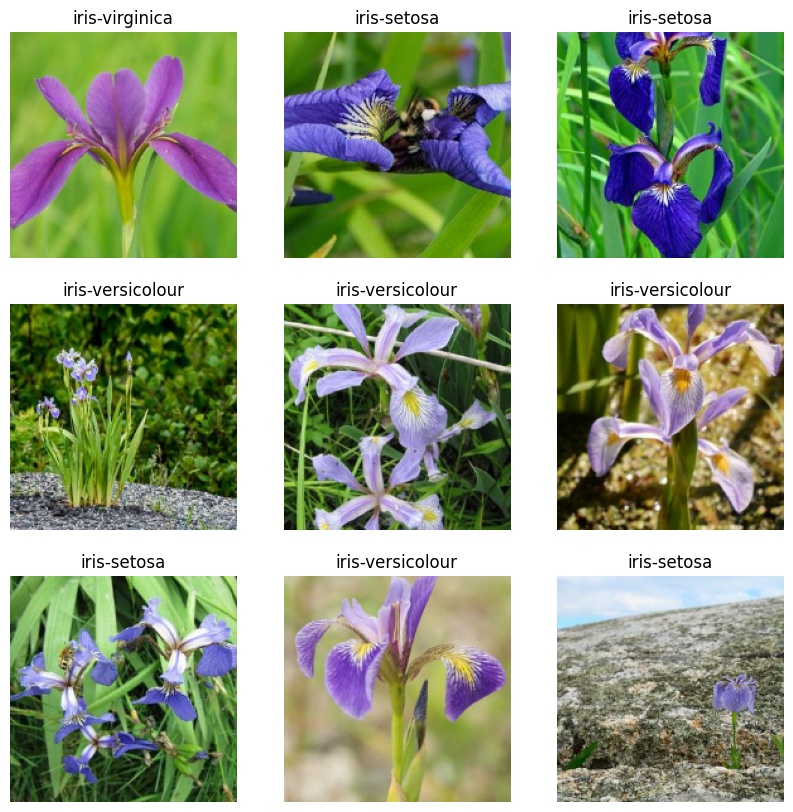

In [47]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [48]:
AUTOTUNE = tf.data.AUTOTUNE

In [49]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [50]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

DATA AUGMENTATION -  a machine learning technique that artificially increases the size of a training set by making minor changes to existing data. These changes can include:
Spatial transformations: Rotation, flipping, scaling, and deformation
Appearance augmentation: Brightness and contrast
Image quality: Blurriness, sharpness, and noise level

In [51]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

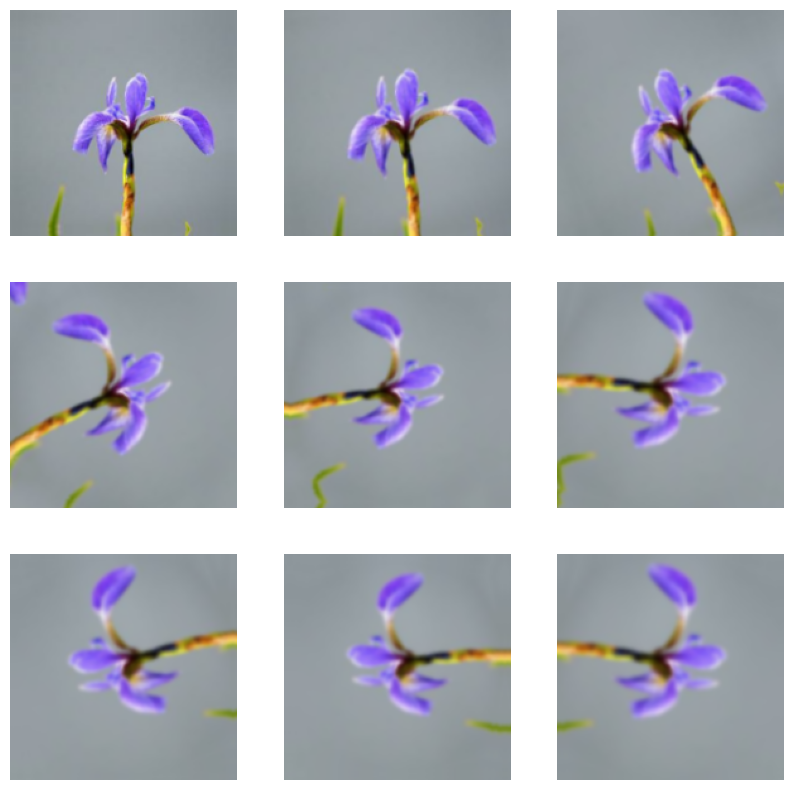

In [52]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

NOW WE WILL CREATE OUR MODEL (MODEL CREATION)

In [53]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.5060 - loss: 1.1867 - val_accuracy: 0.6190 - val_loss: 0.9365
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - accuracy: 0.6736 - loss: 0.8753 - val_accuracy: 0.6190 - val_loss: 0.9547
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.6598 - loss: 0.8631 - val_accuracy: 0.6190 - val_loss: 0.9059
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - accuracy: 0.6411 - loss: 0.8560 - val_accuracy: 0.6190 - val_loss: 0.9502
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.6436 - loss: 0.8484 - val_accuracy: 0.6190 - val_loss: 0.9130
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.6242 - loss: 0.8536 - val_accuracy: 0.6190 - val_loss: 0.9309
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.6437 - loss: 0.7981 - val_accuracy: 0.6310 - val_loss: 0.9054
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - accuracy: 0.6696 - loss: 0.7511 - val_accuracy: 0.

In [60]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img('Test_Images/download (2).jfif', target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [61]:
classify_images('Test_Images/images (2).jfif')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


'The Image belongs to iris-versicolour with a score of 96.53621315956116'

In [68]:
# Save the model in the native Keras format
model.save('Iris_Classification.keras')